## 1. Setup main imports

In [1]:
# Torch imports
import torch
import torchvision
import torchvision.models as models
import torch.nn as nn
from torchvision import transforms, datasets
from torchinfo import summary
import numpy as np
from PIL import Image
from pathlib import Path
import os
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from typing import List, Dict, Tuple
from tqdm.notebook import tqdm
import sys

print(os.getcwd())

/home/felipe/IA/Food101/model-training


In [2]:
# Setting device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## 2. Setting up data

### Linux based file system

In [57]:
import shutil

# Define the directories
base_dir = 'data/food-101/images'
train_dir = 'train_images'
test_dir = 'test_images'
meta_dir = 'data/food-101/meta'

# Define new directories
new_dir = 'data/new-food-101'
images_dir = 'data/new-food-101/images'
train_dir = f'{images_dir}/train'
test_dir = f'{images_dir}/test'
meta_dir = 'data/new-food-101/meta'

# Create new directories
os.makedirs(new_dir, exist_ok=True)
os.makedirs(images_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(meta_dir, exist_ok=True)

# Moving all meta files to new directory
# Get all elements from meta directory
meta_files = os.listdir(Path("data/food-101/meta"))

# Move all meta files to new directory
for file in meta_files:
    shutil.move(os.path.join("data/food-101/meta", file), os.path.join(meta_dir, file))


# Move all images to new directory
# Get all classes from the train directory
classes = os.listdir(Path("data/food-101/images"))

# Create new directories for each class
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Move train images to new directory
# Get all test images from 'train.txt'
with open("data/new-food-101/meta/train.txt", "r") as file:
    # Get all train images
    train_images = file.readlines()
    print(train_images[0])
    
     # Add .jpg extension to all images
    new_train_images = [f'{image.strip("\n")}.jpg' for image in train_images]

    # Move all train images to new directory
    for image in new_train_images:
        class_name, image_name = image.split("/")
        shutil.move(os.path.join("data/food-101/images", class_name, image_name), os.path.join(train_dir, class_name, image_name))


# Move test images to new directory
# Get all test images from 'test.txt'
with open("data/new-food-101/meta/test.txt", "r") as file:
    # Get all test images
    test_images = file.readlines()
    
    # Add .jpg extension to all images
    new_test_images = [f'{image.strip("\n")}.jpg' for image in test_images]

    # Move all test images to new directory
    for image in new_test_images:
        class_name, image_name = image.split("/")
        shutil.move(os.path.join("data/food-101/images", class_name, image_name), os.path.join(test_dir, class_name, image_name))


print("Data has been successfully moved to new directory!")


FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'data\\food-101\\meta'

### Windows Based file system

In [8]:
import shutil
from pathlib import Path
import os

# Define the directories using Path for better cross-platform compatibility
base_dir = Path('data/food-101/images')

# Base for new directories
train_dir = Path('train_images')
test_dir = Path('test_images')

# Getting meta from the old
meta_dir = Path('data/food-101/meta')

# Define new directories
new_dir = Path('data/new-food-101')
images_dir = new_dir / 'images'
train_dir = images_dir / 'train'
test_dir = images_dir / 'test'
new_meta_dir = new_dir / 'meta'

# Create new directories
os.makedirs(new_dir, exist_ok=True)
os.makedirs(images_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(new_meta_dir, exist_ok=True)

# Moving all meta files to new directory
# Get all elements from meta directory
meta_files = list(meta_dir.glob('*'))

# Move all meta files to new directory
for file in meta_files:
    shutil.move(str(file), str(meta_dir / file.name))

# Move all images to new directory
# Get all classes from the base directory
classes = [d.name for d in base_dir.iterdir() if d.is_dir()]

# Create new directories for each class
for class_name in classes:
    os.makedirs(train_dir / class_name, exist_ok=True)
    os.makedirs(test_dir / class_name, exist_ok=True)

# Function to move images based on a list from a text file
def move_images(source_base_dir, dest_dir, meta_file):
    with open(meta_file, "r") as file:
        images = [f"{image.strip()}.jpg" for image in file.readlines()]

        for image in images:
            class_name, image_name = image.split("/")
            source_path = source_base_dir / class_name / image_name
            dest_path = dest_dir / class_name / image_name
            os.makedirs(dest_dir / class_name, exist_ok=True)
            shutil.move(str(source_path), str(dest_path))

# Move train images to new directory
move_images(base_dir, train_dir, meta_dir / 'train.txt')

# Move test images to new directory
move_images(base_dir, test_dir, meta_dir / 'test.txt')

print("Data has been successfully moved to new directory!")


Data has been successfully moved to new directory!


In [3]:
# Once the images have been moved, we can delete the old directories
# Delete old directories
shutil.rmtree("data/food-101")

# Renaming the new directories
os.rename("data/new-food-101", "data/food-101")


NameError: name 'shutil' is not defined

In [3]:
# Using pathlib to get the image paths
DATAPATH = Path('data')
food101 = DATAPATH/'food-101'/'images'
print(food101)


data/food-101/images


In [8]:
# Walking through directories

for dirpath, dirnames, filenames in os.walk(food101):
    print(f'Found directory: {dirpath}')
    print(f'Directory has {len(dirnames)} directories and {len(filenames)} files')
    print('---------------------------------------------')

Found directory: data/food-101/images
Directory has 2 directories and 0 files
---------------------------------------------
Found directory: data/food-101/images/train
Directory has 101 directories and 0 files
---------------------------------------------
Found directory: data/food-101/images/train/croque_madame
Directory has 0 directories and 750 files
---------------------------------------------
Found directory: data/food-101/images/train/cheese_plate
Directory has 0 directories and 750 files
---------------------------------------------
Found directory: data/food-101/images/train/samosa
Directory has 0 directories and 750 files
---------------------------------------------
Found directory: data/food-101/images/train/huevos_rancheros
Directory has 0 directories and 750 files
---------------------------------------------
Found directory: data/food-101/images/train/waffles
Directory has 0 directories and 750 files
---------------------------------------------
Found directory: data/foo

In [4]:
# Setup train and testing directories
train_dir = Path('data/food-101/images/train')

test_dir = Path("data/food-101/images/test")

train_dir, test_dir

(PosixPath('data/food-101/images/train'),
 PosixPath('data/food-101/images/test'))

### Visualizing a random image

Class Name: breakfast_burrito


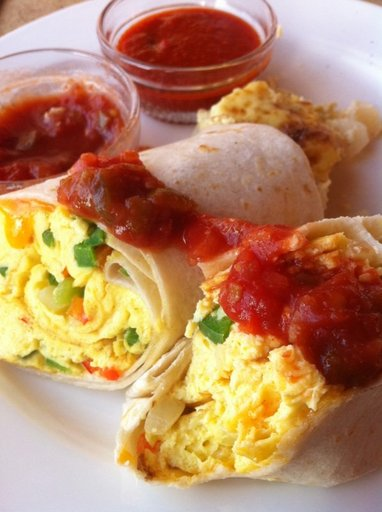

In [5]:
# Getting all image paths
train_images = list(train_dir.rglob('*/*.jpg'))

# Pick a random image
random_image = random.choice(train_images)

# Opening image
img = Image.open(random_image)

# Getting class name
class_name = random_image.parent.name

# Plotting image and metadata
print(f'Class Name: {class_name}')
img

Text(0.5, 1.0, 'Image class: breakfast_burrito | Image shape: (512, 382, 3) -> (H, W, C)')

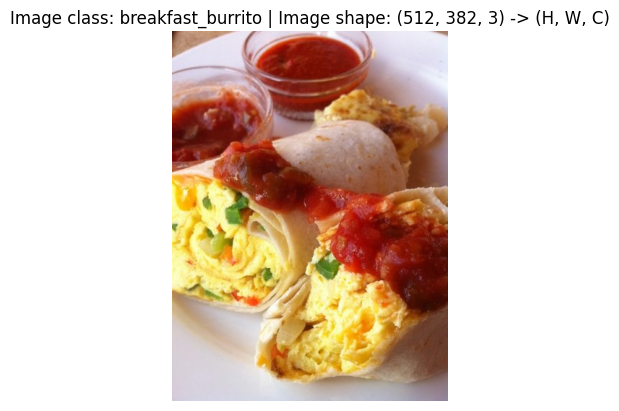

In [6]:
# Turning the image into a numpy array
img_array = np.array(img)

# Plotting with matplotlib
plt.imshow(img_array)
plt.axis('off')
plt.title(f"Image class: {class_name} | Image shape: {img_array.shape} -> (H, W, C)")

## 3. Transform the data

In [7]:
# Data augmentation for training
train_transform = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       torchvision.transforms.AutoAugment(torchvision.transforms.AutoAugmentPolicy.IMAGENET),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
# Data augmentation for testing
test_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

In [8]:
# Testing the transforms
print("Image before transformation:")
print(f"Image type: {img_array.dtype}")
print(f"Image shape: {img_array.shape} -> (H, W, C)")

transformed_img = test_transform(img)
print("\nImage after transformation:")
print(f"Transformed image type: {transformed_img.dtype}")
print(f"Transformed image shape: {transformed_img.shape} -> (C, H, W)")

Image before transformation:
Image type: uint8
Image shape: (512, 382, 3) -> (H, W, C)

Image after transformation:
Transformed image type: torch.float32
Transformed image shape: torch.Size([3, 224, 224]) -> (C, H, W)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Transformed Image')

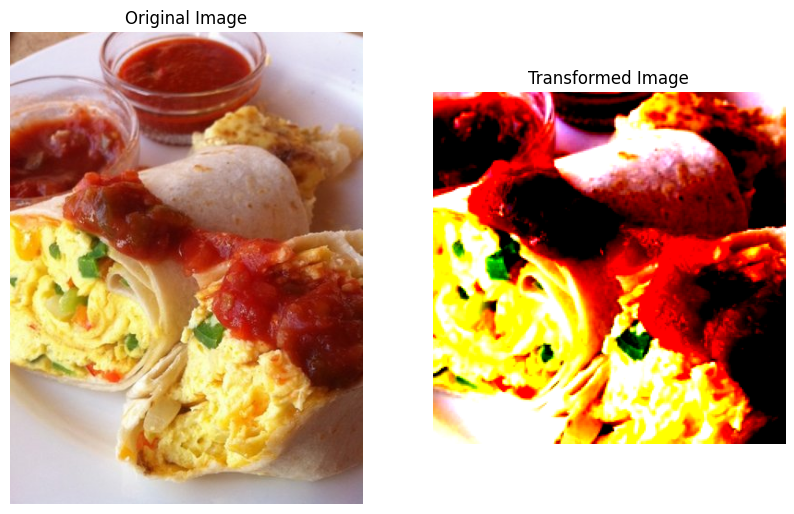

In [9]:
# Plotting the original and transformed image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(transformed_img.permute(1, 2, 0))
plt.axis('off')
plt.title("Transformed Image")


In [10]:
import os

def remove_ds_store_files(root_dir):
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file == '.DS_Store':
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f'Removed: {file_path}')

# Path to your dataset directory
dataset_dir = 'data/food-101/images'  # Update this path to your actual dataset directory

remove_ds_store_files(dataset_dir)
print('All .DS_Store files have been removed.')


All .DS_Store files have been removed.


## 4. Loading the data into a Dataset

In [10]:
# Define the directories using Path for better cross-platform compatibility
base_dir = Path('data/food-101/images')
train_dir = base_dir / 'train'
test_dir = base_dir / 'test'

# Using ImageFolder to load the data
train_data = datasets.ImageFolder(str(train_dir), transform=train_transform)
test_data = datasets.ImageFolder(str(test_dir), transform=test_transform)

# Output to see what's loaded
print(f'Train data classes: {train_data.classes}')
print(f'Test data classes: {test_data.classes}')


Train data classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', '

In [11]:
# Getting class names as a list
class_names = train_data.classes

# Getting class names as a dict
class_names_dict = train_data.class_to_idx

class_names, class_names_dict

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

In [18]:
# Checking length of the train and test data
len(train_data), len(test_data)

(75750, 25250)

## 5. Creating Dataloader

In [14]:
# Setting batch size
BATCH_SIZE = 128

# Setting up the dataloaders
NUM_WORKERS = os.cpu_count()

# Setting up the dataloaders
train_loader = DataLoader(train_data,
                          batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS,
                          pin_memory=True) # Set to True if using GPU. It provides faster data transfer to CUDA-enabled GPUs

test_loader = DataLoader(test_data,
                            batch_size=BATCH_SIZE, shuffle=False,
                            num_workers=NUM_WORKERS,
                            pin_memory=True)

len(train_loader), len(test_loader)

(592, 198)

In [15]:
# Getting the first batch of data
img, label = next(iter(train_loader))

# Checking the shape of the image and label
print(f"Image batch shape: {img.shape} -> (B, C, H, W)")
print(f"Label batch shape: {label.shape} -> (B)")

Image batch shape: torch.Size([128, 3, 224, 224]) -> (B, C, H, W)
Label batch shape: torch.Size([128]) -> (B)


## 6. Creating the model

In [16]:
# Loading the pretrained model
weights = models.DenseNet201_Weights.IMAGENET1K_V1

# model = models.DenseNet(weights= weights)
model = models.densenet201(weights= weights)

In [17]:
# Freezing parameters to avoid backdrop
for param in model.parameters():
    param.requires_grad = False

In [20]:
checkpoint_path = "./classifier/food_classifier.pt"
classifier = nn.Sequential(
    nn.Linear(1920, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 101),
)

model.classifier = classifier
model.load_state_dict(torch.load(checkpoint_path, map_location='cpu'), strict= False)
model.to(device)

summary(model)

Layer (type:depth-idx)                   Param #
DenseNet                                 --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       (9,408)
│    └─BatchNorm2d: 2-2                  (128)
│    └─ReLU: 2-3                         --
│    └─MaxPool2d: 2-4                    --
│    └─_DenseBlock: 2-5                  --
│    │    └─_DenseLayer: 3-1             (45,440)
│    │    └─_DenseLayer: 3-2             (49,600)
│    │    └─_DenseLayer: 3-3             (53,760)
│    │    └─_DenseLayer: 3-4             (57,920)
│    │    └─_DenseLayer: 3-5             (62,080)
│    │    └─_DenseLayer: 3-6             (66,240)
│    └─_Transition: 2-6                  --
│    │    └─BatchNorm2d: 3-7             (512)
│    │    └─ReLU: 3-8                    --
│    │    └─Conv2d: 3-9                  (32,768)
│    │    └─AvgPool2d: 3-10              --
│    └─_DenseBlock: 2-7                  --
│    │    └─_DenseLayer: 3-11            (53,760)
│    │    └─


## 7. Preparing the training loop

In [21]:
# Creating training function
def train_step(model : nn.Module,
               dataloader: DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Dict[str, float]:
    
    # Setting model to train mode
    model.train()

    # Starting accuracy and loss at 0
    train_loss, train_accuracy = 0.0, 0.0

    # Looping through the data
    for images, label in tqdm(dataloader):
        # Sending data to device
        images, label = images.to(device), label.to(device)

        # Forward pass
        output = model(images)

        # Calculating loss
        loss = loss_fn(output, label)
        train_loss += loss.item()

        # Zeroing the gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Optimizing the parameters
        optimizer.step()

        # Calculate accuracy
        predictions = output.argmax(dim=1)
        train_accuracy += torch.sum(predictions == label).item() / len(predictions)

    # Adjusting metrics
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)

    return {'train_loss': train_loss, 'train_accuracy': train_accuracy}


In [22]:
# Creating testing function
def testing_step(model: nn.Module,
                 dataloader: DataLoader,
                 loss_fn: nn.Module,
                 device: torch.device) -> Dict[str, float]:
    
    # Setting model to evaluation mode
    model.eval()

    # Starting accuracy and loss at 0
    test_loss, test_accuracy = 0.0, 0.0

    # Turning off gradient computation
    with torch.inference_mode():
        # Looping through the data
        for images, label in tqdm(dataloader):
            # Sending data to device
            images, label = images.to(device), label.to(device)

            # Forward pass
            outputs = model(images)

            # Calculating loss
            loss = loss_fn(outputs, label)
            test_loss += loss.item()

            # Calculating accuracy
            predictions = outputs.argmax(dim=1)
            test_accuracy += torch.sum(predictions == label).item() / len(predictions)

    # Adjusting metrics
    test_loss /= len(dataloader)
    test_accuracy /= len(dataloader)

    return {'test_loss': test_loss, 'test_accuracy': test_accuracy}

In [23]:
# Function to train the model
def training(model: nn.Module,
             train_loader: DataLoader,
             test_loader: DataLoader,
             loss_fn: nn.Module,
             optimizer: torch.optim.Optimizer,
             device: torch.device,
             epochs: int) -> Dict[str, list]:
    
    # Lists to store metrics
    results = {'train_loss': [], 'train_accuracy': [], 'test_loss': [], 'test_accuracy': []}

    # Loop through the epochs
    for epoch in tqdm(range(epochs)):
        # Training step
        train_results = train_step(model, train_loader, loss_fn, optimizer, device)

        # Testing step
        test_results = testing_step(model, test_loader, loss_fn, device)

        # Saving metrics
        results['train_loss'].append(train_results['train_loss'])
        results['train_accuracy'].append(train_results['train_accuracy'])
        results['test_loss'].append(test_results['test_loss'])
        results['test_accuracy'].append(test_results['test_accuracy'])

        print(f"Epoch: {epoch + 1}/{epochs} | "
              f"Train loss: {train_results['train_loss']:.4f} | "
              f"Train accuracy: {train_results['train_accuracy']:.4f} | "
              f"Test loss: {test_results['test_loss']:.4f} | "
              f"Test accuracy: {test_results['test_accuracy']:.4f}")
        
    return results

## 8. Training the model

In [24]:
# Setting seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setting device again
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Setting the number of Epochs
EPOCHS = 5

# Setting the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=[0.9, 0.999])

# Starting timer
from time import time
start_time = time()

# Training the model
model_results = training(model, train_loader, test_loader, loss_fn, optimizer, device, EPOCHS)

# Ending timer
end_time = time() 

# Calculating total time
total_time = end_time - start_time

# Printing total time3
print("Model has been successfully trained!")
print(f"Total training time: {total_time // 60:.0f} minutes and {total_time % 60:.0f} seconds on {device}")
print(f"Average time per epoch: {total_time / EPOCHS:.2f} seconds")
print("Training results: ", model_results)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch: 1/5 | Train loss: 1.0983 | Train accuracy: 0.7156 | Test loss: 0.3132 | Test accuracy: 0.9066


  0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch: 2/5 | Train loss: 1.0680 | Train accuracy: 0.7235 | Test loss: 0.2991 | Test accuracy: 0.9123


  0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch: 3/5 | Train loss: 1.0618 | Train accuracy: 0.7233 | Test loss: 0.3088 | Test accuracy: 0.9098


  0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch: 4/5 | Train loss: 1.0468 | Train accuracy: 0.7272 | Test loss: 0.3297 | Test accuracy: 0.9052


  0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch: 5/5 | Train loss: 1.0373 | Train accuracy: 0.7303 | Test loss: 0.3012 | Test accuracy: 0.9117
Model has been successfully trained!
Total training time: 58 minutes and 7 seconds on cuda
Average time per epoch: 697.46 seconds
Training results:  {'train_loss': [1.0982872908179824, 1.06802524424888, 1.0618116886833229, 1.046777121118597, 1.0373032803873758], 'train_accuracy': [0.7155711260433227, 0.7235052435247749, 0.7233274749933758, 0.7271506628411499, 0.7302550137453631], 'test_loss': [0.3131749051637157, 0.299060395174434, 0.30876059311376225, 0.3296830452670816, 0.3011526734959684], 'test_accuracy': [0.9066445707070707, 0.9123356729055259, 0.9097709633095662, 0.9051846590909091, 0.9117043597742127]}


## 9. Evaluating model

In [25]:
# Function to plot the loss curve
def plot_loss_curve(results: Dict[str, list]) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(results['train_loss'], label='Train Loss', marker='o')
    plt.plot(results['test_loss'], label='Test Loss', marker='o')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

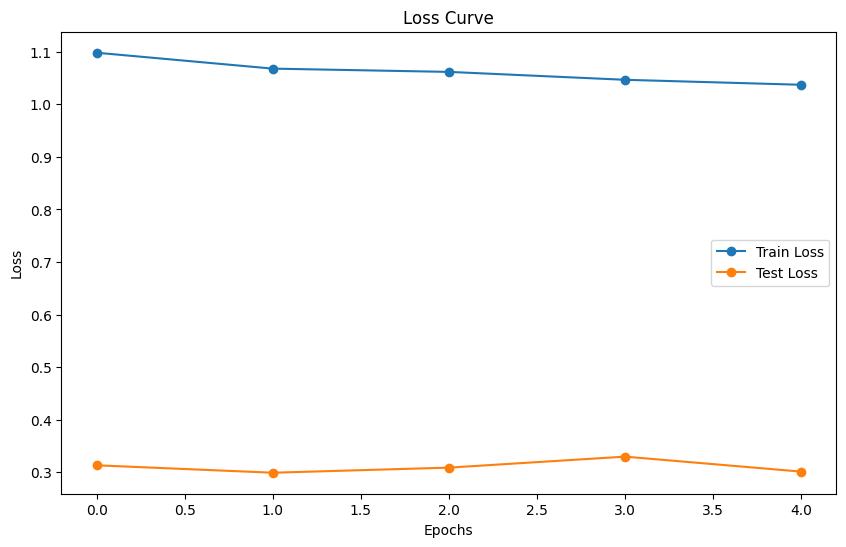

In [26]:
# Plotting the loss curve
plot_loss_curve(model_results)

## 10. Plotting a batch of images with their predictions

In [34]:
# Function to plot a random batch of images
def plot_random_batch(model : nn.Module, dataloader: DataLoader, class_names: List[str]) -> None:
    # Setting model to evaluation mode
    model.eval()

    # Getting a random batch of data
    images, labels = random.choice(list(iter(dataloader)))

    # Sending data to device
    images, labels = images.to('cpu'), labels.to('cpu')

    # Getting predictions
    outputs = model(images)

    # Getting predicted labels
    predictions = outputs.argmax(dim=1)

    # Plotting the images
    plt.figure(figsize=(16, 16))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).cpu())
        color = 'green' if predictions[i] == labels[i] else 'red'
        plt.axis(False)
        plt.title(f"Actual: {class_names[labels[i]]} | Predicted: {class_names[predictions[i]]}", color=color)
    plt.show()

In [35]:
plot_random_batch(model, test_loader, class_names)

RuntimeError: Caught RuntimeError in pin memory thread for device 0.
Original Traceback (most recent call last):
  File "C:\Users\951550731\AppData\Roaming\Python\Python39\site-packages\torch\utils\data\_utils\pin_memory.py", line 37, in do_one_step
    data = pin_memory(data, device)
  File "C:\Users\951550731\AppData\Roaming\Python\Python39\site-packages\torch\utils\data\_utils\pin_memory.py", line 88, in pin_memory
    clone[i] = pin_memory(item, device)
  File "C:\Users\951550731\AppData\Roaming\Python\Python39\site-packages\torch\utils\data\_utils\pin_memory.py", line 58, in pin_memory
    return data.pin_memory(device)
RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



## 10. Saving and loading the model

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [12]:
# Creating directory to savel the model
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(exist_ok=True)

# Saving the model
# torch.save(model.state_dict(), MODEL_PATH/'food101-inception-model.pth')

In [13]:
# Load the saved model and label encoder
model = models.densenet201(weights=None)
classifier = nn.Sequential(
    nn.Linear(1920, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 101),
)
model.classifier = classifier
model.load_state_dict(torch.load(MODEL_PATH/'food101-inception-model.pth', map_location='cpu'))
model.to("cpu")
summary(model, input_size=(32, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
DenseNet                                 [32, 101]                 --
├─Sequential: 1-1                        [32, 1920, 7, 7]          --
│    └─Conv2d: 2-1                       [32, 64, 112, 112]        9,408
│    └─BatchNorm2d: 2-2                  [32, 64, 112, 112]        128
│    └─ReLU: 2-3                         [32, 64, 112, 112]        --
│    └─MaxPool2d: 2-4                    [32, 64, 56, 56]          --
│    └─_DenseBlock: 2-5                  [32, 256, 56, 56]         --
│    │    └─_DenseLayer: 3-1             [32, 32, 56, 56]          45,440
│    │    └─_DenseLayer: 3-2             [32, 32, 56, 56]          49,600
│    │    └─_DenseLayer: 3-3             [32, 32, 56, 56]          53,760
│    │    └─_DenseLayer: 3-4             [32, 32, 56, 56]          57,920
│    │    └─_DenseLayer: 3-5             [32, 32, 56, 56]          62,080
│    │    └─_DenseLayer: 3-6             [32, 32, 56, 56]    

## Plotting a batch of images with their predictions


In [14]:
# Function to plot a random batch of images
def plot_random_batch(model : nn.Module, dataloader: DataLoader, class_names: List[str]) -> None:
    # Setting model to evaluation
    model.to("cpu")
    model.eval()
    images, labels = random.choice(list(iter(dataloader)))
    outputs = model(images.to("cpu"))
    predictions = outputs.argmax(dim=1)
    plt.figure(figsize=(16, 16))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].permute(1, 2, 0))
        color = 'green' if predictions[i] == labels[i] else 'red'
        plt.axis(False)
        plt.title(f"Actual: {class_names[labels[i]]} | Predicted: {class_names[predictions[i]]}", color=color)
    plt.show()

In [16]:
# Getting smaller batch size
BATCH_SIZE = 16
NUM_WORKERS = os.cpu_count()

# Setting up the new test dataloader
test_loader = DataLoader(test_data,
                         batch_size=BATCH_SIZE, shuffle=False,
                         num_workers=NUM_WORKERS)


In [17]:
plot_random_batch(model, test_loader, class_names)

KeyboardInterrupt: 

In [18]:
# Function to predict the class of an image
import torchvision.transforms.functional as TF

def pred_and_plot_image(model: nn.Module,
                        image_path: str,
                        device: str,
                        class_names: List[str],
                        transform=None) -> None:
    # Carrega a imagem como PIL Image
    target_image = Image.open(image_path)

    # Aplica as transformações
    if transform:
        target_image = transform(target_image)
    else:
        # Converta para tensor e normalize aqui se nenhuma transformação foi fornecida
        target_image = TF.to_tensor(target_image)
        target_image = TF.normalize(target_image, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

    # Certifica que a imagem e o modelo estão no mesmo dispositivo
    model.to(device)
    target_image = target_image.to(device)

    model.eval()
    with torch.inference_mode():
        # Adiciona a dimensão de lote
        target_image = target_image.unsqueeze(0)

        # Forward pass
        target_image_preds = model(target_image)

        # Converta logits para probabilidades
        target_image_probs = nn.functional.softmax(target_image_preds, dim=1)

        # Pega a classe com maior probabilidade
        target_image_preds_argmax = target_image_preds.argmax().cpu()

        # Plota a imagem
        plt.imshow(target_image[0].permute(1, 2, 0).cpu())
        if class_names:
            plt.title(f"Prediction: {class_names[target_image_preds_argmax]} | Probability: {target_image_probs.max().item():.3f}")
        else:
            plt.title(f"Prediction: {target_image_preds_argmax.cpu()} | Probability: {target_image_probs.max().item():.3f}")

        plt.axis(False)
        plt.show()

# Agora a função está ajustada para trabalhar com a imagem como PIL Image e depois convertê-la para tensor dentro da condição de transformação.


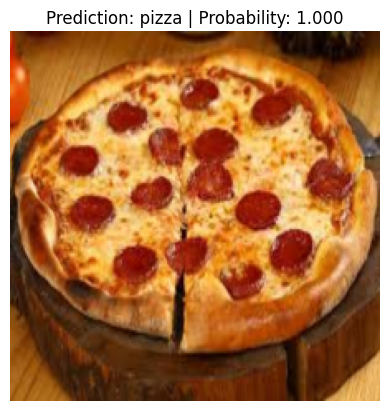

In [20]:
custom_image_path = 'data/pizza.jpeg'
simple_transform = transforms.Compose([transforms.Resize((224, 224)),
                                        transforms.ToTensor()])
pred_and_plot_image(model, custom_image_path, device, class_names, simple_transform)